# Dataset

## Custom dataset in pytorch

Assuming we have our data in numpy format, we will create a custom pytorch dataset object that will load this data

### Download data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

### Install sklearn library

In [1]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 543.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 495.5 kB/s eta 0:00:23
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.0 MB 481.4 kB/s eta 0:00:23
    ------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------------ --------------------------- 13.5/44.7 MB 381.1 kB/s eta 0:01:22
   ------------ --------------------------- 13.6/44.7 MB 379.5 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 379.5 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 379.5 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 378.2 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 378.2 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 377.1 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 377.1 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 377.1 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 377.1 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 375.4 kB/s eta 0:01:23
   ------------ --------------------------- 13.6/44.7 MB 375.4 kB/s eta 0:01:23
   ------------ -----------------------

In [1]:
from sklearn.datasets import load_digits

In [2]:
data = load_digits().data

In [3]:
data.shape

(1797, 64)

In [4]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
targets = load_digits().target

In [6]:
targets.shape

(1797,)

In [7]:
targets[0]

0

### Split data into training and testing

to split data into training and testing use `train_test_split()` function from sklearn.

Parameters `stratify` will ensure the same distribution of data in the training and testing sets, in our case we want the distribution of classes to be the same in both sets, so we specify `stratify = traget` which will ensure an equal distribution of data with respect to the target variable

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_X, test_X, train_y, test_y = train_test_split(data, targets, train_size=0.8, stratify=targets) # x, y, train_size, data according to which we make stratification

In [10]:
train_X.shape

(1437, 64)

In [11]:
test_X.shape

(360, 64)

### Dataset class

To create a custom dataset in pytroch, we need to create a class of this dataset that inherits from the Dataset class.

Our class must have at least 3 methods implemented:

`__init__(self, *args, **kwargs)`:
* function called when initializing the object, in it we should assign all data used in the dataset **Note** - it is best that all data is in numpy format, otherwise the dataset may have problems with multithreading

`__len__(self):`
* a function that returns the size of our dataset

`__getitem__(self, idx)`:
* a function that returns a specific element from the dataset and index `idx`

In [12]:
from torch.utils.data import Dataset

In [14]:
class DigitsDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx] / 255
        y = self.targets[idx]
        
        return x, y

In [15]:
train_dataset = DigitsDataset(train_X, train_y)

In [16]:
test_dataset = DigitsDataset(test_X, test_y)

In [17]:
test_dataset[0]

(array([0.        , 0.00392157, 0.03137255, 0.05098039, 0.05882353,
        0.01960784, 0.        , 0.        , 0.        , 0.03137255,
        0.05490196, 0.02745098, 0.0627451 , 0.05490196, 0.        ,
        0.        , 0.        , 0.03921569, 0.04705882, 0.00392157,
        0.03921569, 0.0627451 , 0.00784314, 0.        , 0.        ,
        0.00784314, 0.04705882, 0.05490196, 0.05882353, 0.0627451 ,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.01568627, 0.01568627, 0.05882353, 0.03137255, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03529412, 0.03529412, 0.        , 0.        , 0.        ,
        0.03529412, 0.02745098, 0.00392157, 0.03921569, 0.04705882,
        0.        , 0.        , 0.        , 0.02352941, 0.05098039,
        0.0627451 , 0.05882353, 0.02352941, 0.        ]),
 9)

In [18]:
test_dataset[1]

(array([0.        , 0.        , 0.03529412, 0.03921569, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.03137255,
        0.0627451 , 0.0627451 , 0.03921569, 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.02745098, 0.01568627,
        0.0627451 , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.0627451 , 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03921569, 0.0627451 , 0.05490196, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.05490196, 0.02745098, 0.        , 0.        , 0.        ,
        0.04313725, 0.03921569, 0.01568627, 0.04313725, 0.04705882,
        0.        , 0.        , 0.        , 0.03137255, 0.05490196,
        0.0627451 , 0.05882353, 0.02352941, 0.        ]),
 3)

## Dataloader

`Dataloader` is responsible for loading data from the dataset - dividing it into batches that are processed simultaneously, loading them in a specific order, etc.

In [19]:
from torch.utils.data import DataLoader

In [20]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [21]:
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Load a single batch

In [22]:
single_batch = next(iter(train_dataloader))

In [23]:
single_batch[0].shape

torch.Size([32, 64])

In [24]:
single_batch[0].max()

tensor(0.0627, dtype=torch.float64)

In [25]:
single_batch[1].shape

torch.Size([32])

## Neural network

### Layers in pytorch

Basic layers in pytorch are available and can be found in `torch.nn`

Fully connected layer: `nn.Linear(in_features, out_features)`
* in_features: input size
* out_features: output size
* *Remember: the weights in the layers are matrices*

In [26]:
from torch import nn

In [27]:
fc = nn.Linear(10, 20)

In [28]:
fc

Linear(in_features=10, out_features=20, bias=True)

at the beginning the weights are random

In [29]:
fc.weight

Parameter containing:
tensor([[ 0.0744,  0.3064,  0.1545,  0.3061, -0.0933,  0.1735, -0.2151, -0.0245,
          0.1440, -0.1312],
        [-0.2985, -0.1518, -0.1679,  0.0252,  0.1484, -0.0030, -0.0652,  0.0619,
         -0.2710, -0.1834],
        [ 0.2727, -0.2011, -0.1572,  0.1272,  0.2378, -0.0565,  0.2903, -0.2526,
          0.0727,  0.1100],
        [ 0.1469, -0.1993,  0.0296,  0.0141, -0.1533,  0.2370,  0.1798, -0.0338,
         -0.2379, -0.0878],
        [-0.1217, -0.1181,  0.1268,  0.2457, -0.1708, -0.1354, -0.1143, -0.2133,
          0.2051, -0.2874],
        [-0.0431, -0.1177, -0.1904, -0.0126, -0.2344, -0.0040, -0.2574,  0.1216,
         -0.0491, -0.1870],
        [ 0.0858,  0.2686,  0.2559, -0.3062, -0.1742,  0.2383,  0.2125, -0.0235,
          0.2083,  0.0298],
        [-0.0135, -0.2838, -0.0800, -0.2784, -0.0744,  0.2254,  0.0719, -0.1262,
          0.2069,  0.0070],
        [ 0.2197, -0.1685,  0.0632, -0.2925,  0.1603, -0.3078, -0.1869,  0.1175,
         -0.0753, -0.0250

In [30]:
fc.weight.shape

torch.Size([20, 10])

## Activation functions in pytorch

In [31]:
import torch.nn.functional as F

In [32]:
from torch import Tensor

In [33]:
F.softmax(Tensor([1, 2, 3]), dim=0)

tensor([0.0900, 0.2447, 0.6652])

## Neural network

To create a neural network in pytorch, we need to create a class that will inherit from `torch.nn.Module` class

Our class must have at least 2 functions implemented.

`__init__(self, *args, **kwargs)`
* initialize all network parameters (for example layers).

`forward(self, x)`
* implements the forward data logic of the neural network

In [34]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)
        self.fc2 = nn.Linear(100, output_size)
    
    def forward(self, x):
        out = self.fc1(x) # input x passes through the first layer
        out = F.relu(out) # we apply activation functions to the first layer
        out = self.fc2(out) # the output of the first layer passes through the second layer
        
        if not self.training:
            out = F.softmax(out, dim=1) # if the network is not in training mode, the output of the second layer passes through the softmax activation functions
            
        return out


In [35]:
model = Model(64, 10)

## Training

### Loss functions

The error functions are available in the `torch.nn` module

In [36]:
ce_loss = nn.CrossEntropyLoss() # classification
mse_loss = nn.MSELoss() # regression

The error function always returns a scalar

In [37]:
ce_loss(Tensor([0.1, 0.1, 0.8]), Tensor([0, 0, 1]))

tensor(0.6897)

In [38]:
mse_loss(Tensor([0.1, 0.1, 0.8]), Tensor([0, 0, 1]))

tensor(0.0200)

To calculate the gradient using the error function we call `loss.backward()`

In [39]:
import torch

In [40]:
x = torch.zeros((1, 3), dtype=torch.float32, requires_grad=True)
y = torch.ones((1, 3), dtype=torch.float32, requires_grad=True)

In [41]:
x

tensor([[0., 0., 0.]], requires_grad=True)

In [42]:
y

tensor([[1., 1., 1.]], requires_grad=True)

In [43]:
loss = ce_loss(x, y)

In [44]:
loss

tensor(3.2958, grad_fn=<DivBackward1>)

In [45]:
loss.backward()

In [46]:
x.grad

tensor([[-5.9605e-08, -5.9605e-08, -5.9605e-08]])

Be careful! The `CrossEntropyLoss()` error function in pytorch already has softmax implemented, so we do not do softmax on the last layer during training

## Optimizers

The optimizers  are available in the `torch.optim` module

In [47]:
from torch import optim

When initializing, the optimizers take the neural network parameters (`model.parameters()`) as an argument. These parameters will be updated by the optimizer during training

In [48]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=64, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)>

How to use the optimizer to update weights.

The optimizer updates the parameters of the neural network using the `optimizer.step()` function, which uses the calculated weight gradients to update them - that is, first we need to calculate the error function and perform backpropagations on it, and then we can use the optimizer

In [49]:
model = Model(64, 10)
adam = optim.Adam(model.parameters())

First layer's weights

In [50]:
model.fc1.weight

Parameter containing:
tensor([[-0.0615,  0.1156, -0.0130,  ..., -0.0852, -0.1123,  0.0348],
        [ 0.1152,  0.0397,  0.0670,  ..., -0.0195, -0.0081,  0.1232],
        [ 0.1041,  0.0848,  0.0520,  ..., -0.0017,  0.0476, -0.0554],
        ...,
        [-0.0250,  0.0848, -0.0070,  ...,  0.1204,  0.0896, -0.0866],
        [ 0.0058,  0.0153, -0.0669,  ..., -0.0319,  0.0548,  0.0093],
        [ 0.1195, -0.1033,  0.0987,  ..., -0.1002,  0.1218, -0.0379]],
       requires_grad=True)

Prediction (100 random data)

In [51]:
y = model(torch.rand(100, 64))

Calculates loss function

In [52]:
loss = ce_loss(y, torch.ones(100, 10))

Error propagation through network layers (gradient calculation)

In [53]:
loss.backward()

Gradient weights

In [54]:
model.fc1.weight.grad

tensor([[-0.0013, -0.0019, -0.0013,  ..., -0.0019, -0.0012, -0.0020],
        [ 0.0036,  0.0031,  0.0027,  ...,  0.0033,  0.0025,  0.0030],
        [ 0.0060,  0.0058,  0.0049,  ...,  0.0053,  0.0053,  0.0051],
        ...,
        [ 0.0297,  0.0304,  0.0258,  ...,  0.0266,  0.0277,  0.0272],
        [-0.0053, -0.0053, -0.0051,  ..., -0.0047, -0.0051, -0.0049],
        [-0.0032, -0.0023, -0.0023,  ..., -0.0029, -0.0027, -0.0026]])

Use the optimizer to update the weights based on the gradient

In [55]:
adam.step()

New weights values

In [56]:
model.fc1.weight

Parameter containing:
tensor([[-0.0605,  0.1166, -0.0120,  ..., -0.0842, -0.1113,  0.0358],
        [ 0.1142,  0.0387,  0.0660,  ..., -0.0205, -0.0091,  0.1222],
        [ 0.1031,  0.0838,  0.0510,  ..., -0.0027,  0.0466, -0.0564],
        ...,
        [-0.0260,  0.0838, -0.0080,  ...,  0.1194,  0.0886, -0.0876],
        [ 0.0068,  0.0163, -0.0659,  ..., -0.0309,  0.0558,  0.0103],
        [ 0.1205, -0.1023,  0.0997,  ..., -0.0992,  0.1228, -0.0369]],
       requires_grad=True)

## Cleaning gradients

After each time the optimizer updates the weights, we want to clear the gradients (to count new ones from scratch for a different data set). This is done using the `optimizer.zero_grad()` function

In [57]:
model.fc1.weight.grad

tensor([[-0.0013, -0.0019, -0.0013,  ..., -0.0019, -0.0012, -0.0020],
        [ 0.0036,  0.0031,  0.0027,  ...,  0.0033,  0.0025,  0.0030],
        [ 0.0060,  0.0058,  0.0049,  ...,  0.0053,  0.0053,  0.0051],
        ...,
        [ 0.0297,  0.0304,  0.0258,  ...,  0.0266,  0.0277,  0.0272],
        [-0.0053, -0.0053, -0.0051,  ..., -0.0047, -0.0051, -0.0049],
        [-0.0032, -0.0023, -0.0023,  ..., -0.0029, -0.0027, -0.0026]])

In [58]:
adam.zero_grad()

In [59]:
model.fc1.weight.grad

# Tasks

## Datasets

In [75]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 640.0 kB/s eta 0:00:19
   ---------------------------------------- 0.1/11.6 MB 787.7 kB/s eta 0:00:15
   ---------------------------------------- 0.1/11.6 MB 819.2 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.6 MB 952.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 952.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 952.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 952.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 952.6 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 890.4 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 890.4 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.6 MB 921.6 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.6 MB 912.9


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Load similar data - manually written digits, but in size 64x64

In [60]:
from sklearn.datasets import fetch_openml

In [61]:
mnist = fetch_openml('mnist_784')

In [62]:
import numpy as np

In [63]:
data = mnist.data.to_numpy()
targets = np.vectorize(lambda x: int(x))(mnist.target.to_numpy())

In [64]:
data.shape

(70000, 784)

In [65]:
targets.shape

(70000,)

### 1. Split the data into training and test data
Split the data 80/20 with stratification

In [66]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
    data, 
    targets, 
    train_size=0.8,
    stratify=targets
)

In [67]:
train_X.shape

(56000, 784)

In [68]:
test_X.shape

(14000, 784)

### 2. Implement the dataset

Note: pixels in the new data are saved as digits from the range 0-255 instead of 0-16 as before. Include this in your normalization

In [69]:
from torch.utils.data import Dataset
class DigitsDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx] / 255
        y = self.targets[idx]
        return x, y


In [70]:
train_dataset = DigitsDataset(train_X, train_y)

In [71]:
test_dataset = DigitsDataset(test_X, test_y)

In [72]:
train_dataset[0][0] # x

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
train_dataset[0][1] # y

3

## Implement dataloader

In [74]:
from torch.utils.data import DataLoader

In [75]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [76]:
from torch import nn
import torch.nn.functional as F

## Neural network

### 1. Implement a neural network:

The network should have 2 hidden layers - the first layer of 200 neurons, the second 100

In [77]:
class Model(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        
        if not self.training:
            out = F.softmax(out, dim=1)
        
        return out


## Training

In [78]:
import torch
from torch import optim

### 1. Initialize model, loss function and optimizer
loss function - cross entropy,
optimizer - adam

In [79]:
model = Model(784, 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [80]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from matplotlib import pyplot as plt
train_losses = []
test_losses = []

for epoch in range(10):
    epoch_train_loss = 0.
    epoch_test_loss = 0.
    
    for data in train_dataloader:
        inputs, labels = data
        
        # reset gradients
        optimizer.zero_grad()
        
        # calculate model's prediction (you may need to convert data to float - inputs.float())
        outputs = model(inputs.float())
        
        # calculate loss function
        loss = loss_fn(outputs, labels.long())
        
        # calculate gradients
        loss.backward()
        
        # update weights
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    with torch.no_grad():
        # for test data we do not calculate gradients
        
        for test_data in test_dataloader:
            inputs, labels = test_data
            # calculate model's prediction (you may need to convert data to float - inputs.float())
            outputs = model(inputs.float())
            
            # calculate loss function
            loss = loss_fn(outputs, labels.long())
            epoch_test_loss += loss.item()
    
    print(f"Epoch {epoch} train loss {epoch_train_loss/len(train_dataloader)}, test_loss {epoch_test_loss/len(test_dataloader)}")
    train_losses.append(epoch_train_loss/len(train_dataloader))
    test_losses.append(epoch_test_loss/len(test_dataloader))


Epoch 0 train loss 0.2686155046192663, test_loss 0.13449594314256896
Epoch 1 train loss 0.10869489621104939, test_loss 0.09758022138859532
Epoch 2 train loss 0.07304852958409382, test_loss 0.08872247765414293
Epoch 3 train loss 0.05349699908676225, test_loss 0.08736110487104963
Epoch 4 train loss 0.04125495482219932, test_loss 0.09037104115574769
Epoch 5 train loss 0.03273139877009089, test_loss 0.08264563080606069
Epoch 6 train loss 0.025706428030545275, test_loss 0.08706911424315175
Epoch 7 train loss 0.023039540747877254, test_loss 0.10315663797364863
Epoch 8 train loss 0.018151561775281152, test_loss 0.09593377409100659
Epoch 9 train loss 0.017811085581602517, test_loss 0.09044174758824929


In [82]:
import matplotlib.pyplot as plt

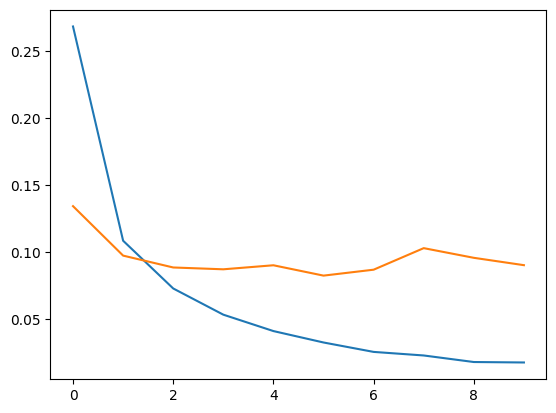

In [83]:
plt.plot(list(range(10)),train_losses)
plt.plot(list(range(10)),test_losses)